# Drug related fraud

In this notebook I am going to explore my dug prescription dataset and I will find the drugs which are having more frauds.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("./datasets/PartD_Prescriber_PUF_NPI_Drug_17.txt", sep='\t')

In [3]:
data.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
0,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE,NaN,...,13.0,390,59.21,NaN,*,NaN,*,NaN,NaN,NaN
1,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,ATORVASTATIN CALCIUM,ATORVASTATIN CALCIUM,11.0,...,27.0,765,259.48,NaN,#,NaN,#,NaN,NaN,NaN
2,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,CEPHALEXIN,CEPHALEXIN,17.0,...,17.0,123,98.99,NaN,#,NaN,#,NaN,NaN,NaN
3,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,CIPROFLOXACIN HCL,CIPROFLOXACIN HCL,11.0,...,12.0,95,120.43,NaN,*,NaN,*,NaN,NaN,NaN
4,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,DOXYCYCLINE HYCLATE,DOXYCYCLINE HYCLATE,17.0,...,17.0,105,300.76,NaN,#,NaN,#,NaN,NaN,NaN


In [4]:
data.columns

Index(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_city', 'nppes_provider_state', 'specialty_description',
       'description_flag', 'drug_name', 'generic_name', 'bene_count',
       'total_claim_count', 'total_30_day_fill_count', 'total_day_supply',
       'total_drug_cost', 'bene_count_ge65', 'bene_count_ge65_suppress_flag',
       'total_claim_count_ge65', 'ge65_suppress_flag',
       'total_30_day_fill_count_ge65', 'total_day_supply_ge65',
       'total_drug_cost_ge65'],
      dtype='object')

I am extracting some important columns from this dataset to explore it

In [5]:
data = data[['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_city', 'nppes_provider_state', 'specialty_description',
       'description_flag', 'drug_name', 'generic_name',
       'total_claim_count','total_day_supply',
       'total_drug_cost']]

In [6]:
# renaming the column name
data=data.rename(columns={'npi':'NPI','nppes_provider_first_name':'first_name', 'nppes_provider_last_org_name':'last_name',
             'nppes_provider_city':'city','nppes_provider_state':'state'})

In [7]:
data.head()

,NPI,last_name,first_name,city,state,specialty_description,description_flag,drug_name,generic_name,total_claim_count,total_day_supply,total_drug_cost
0,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE,13,390,59.21
1,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,ATORVASTATIN CALCIUM,ATORVASTATIN CALCIUM,27,765,259.48
2,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,CEPHALEXIN,CEPHALEXIN,17,123,98.99
3,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,CIPROFLOXACIN HCL,CIPROFLOXACIN HCL,12,95,120.43
4,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,DOXYCYCLINE HYCLATE,DOXYCYCLINE HYCLATE,17,105,300.76


In [8]:
# combining first name and last name

data["Name"]=data["first_name"]+" "+data["last_name"]

In [9]:
data.head()

,NPI,last_name,first_name,city,state,specialty_description,description_flag,drug_name,generic_name,total_claim_count,total_day_supply,total_drug_cost,Name
0,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE,13,390,59.21,ARDALAN ENKESHAFI
1,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,ATORVASTATIN CALCIUM,ATORVASTATIN CALCIUM,27,765,259.48,ARDALAN ENKESHAFI
2,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,CEPHALEXIN,CEPHALEXIN,17,123,98.99,ARDALAN ENKESHAFI
3,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,CIPROFLOXACIN HCL,CIPROFLOXACIN HCL,12,95,120.43,ARDALAN ENKESHAFI
4,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,S,DOXYCYCLINE HYCLATE,DOXYCYCLINE HYCLATE,17,105,300.76,ARDALAN ENKESHAFI


In [10]:
data=data.drop(columns=["first_name","last_name"])

In [11]:
data=data[['NPI', 'Name','city', 'state', 'specialty_description', 'drug_name',
       'generic_name', 'total_drug_cost', 'total_claim_count',
       'total_day_supply']]

In [12]:
data.head()

,NPI,Name,city,state,specialty_description,drug_name,generic_name,total_drug_cost,total_claim_count,total_day_supply
0,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE,59.21,13,390
1,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine,ATORVASTATIN CALCIUM,ATORVASTATIN CALCIUM,259.48,27,765
2,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine,CEPHALEXIN,CEPHALEXIN,98.99,17,123
3,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine,CIPROFLOXACIN HCL,CIPROFLOXACIN HCL,120.43,12,95
4,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine,DOXYCYCLINE HYCLATE,DOXYCYCLINE HYCLATE,300.76,17,105


In [13]:
data["drug_name"].nunique()

2821

In [14]:
data.shape

(25209130, 10)

In [15]:
data["NPI"].nunique()

918009

In [16]:
data[["NPI","drug_name"]]

,NPI,drug_name
0,1003000126,AMLODIPINE BESYLATE
1,1003000126,ATORVASTATIN CALCIUM
2,1003000126,CEPHALEXIN
3,1003000126,CIPROFLOXACIN HCL
4,1003000126,DOXYCYCLINE HYCLATE
...,...,...
25209125,1992999882,CLONAZEPAM
25209126,1992999882,FLUOXETINE HCL
25209127,1992999882,RISPERIDONE
25209128,1992999882,SERTRALINE HCL


Loading the excluded providers dataset

In [17]:
fraud=pd.read_csv("./datasets/fraud.csv",index_col=0)

In [18]:
# merging the drid prescriber dataset and fraud providers

df=pd.merge(data,fraud,on="NPI",how="left")

In [19]:
df.head()

,NPI,Name,city,state,specialty_description,drug_name,generic_name,total_drug_cost,total_claim_count,total_day_supply,is_fraud
0,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE,59.21,13,390,NaN
1,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine,ATORVASTATIN CALCIUM,ATORVASTATIN CALCIUM,259.48,27,765,NaN
2,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine,CEPHALEXIN,CEPHALEXIN,98.99,17,123,NaN
3,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine,CIPROFLOXACIN HCL,CIPROFLOXACIN HCL,120.43,12,95,NaN
4,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine,DOXYCYCLINE HYCLATE,DOXYCYCLINE HYCLATE,300.76,17,105,NaN


In [20]:
df["is_fraud"]=df["is_fraud"].fillna(0)

In [21]:
df.head()

,NPI,Name,city,state,specialty_description,drug_name,generic_name,total_drug_cost,total_claim_count,total_day_supply,is_fraud
0,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE,59.21,13,390,0.0
1,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine,ATORVASTATIN CALCIUM,ATORVASTATIN CALCIUM,259.48,27,765,0.0
2,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine,CEPHALEXIN,CEPHALEXIN,98.99,17,123,0.0
3,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine,CIPROFLOXACIN HCL,CIPROFLOXACIN HCL,120.43,12,95,0.0
4,1003000126,ARDALAN ENKESHAFI,CUMBERLAND,MD,Internal Medicine,DOXYCYCLINE HYCLATE,DOXYCYCLINE HYCLATE,300.76,17,105,0.0


In [22]:
df["is_fraud"].value_counts()

0.0    25192137
1.0       17057
Name: is_fraud, dtype: int64

There are 17057 drug related fraud in the dataset.

In [23]:
df.columns

Index(['NPI', 'Name', 'city', 'state', 'specialty_description', 'drug_name',
       'generic_name', 'total_drug_cost', 'total_claim_count',
       'total_day_supply', 'is_fraud'],
      dtype='object')

In [24]:
df['drug_name'].nunique()

2821

In [25]:
drug=df[["drug_name","is_fraud"]]
drug

,drug_name,is_fraud
0,AMLODIPINE BESYLATE,0.0
1,ATORVASTATIN CALCIUM,0.0
2,CEPHALEXIN,0.0
3,CIPROFLOXACIN HCL,0.0
4,DOXYCYCLINE HYCLATE,0.0
...,...,...
25209189,CLONAZEPAM,0.0
25209190,FLUOXETINE HCL,0.0
25209191,RISPERIDONE,0.0
25209192,SERTRALINE HCL,0.0


In [26]:
# unique drug with fraud sum

drug_fraud=drug.groupby("drug_name")["is_fraud"].sum()

In [27]:
drug_fraud=drug_fraud.reset_index()
drug_fraud

,drug_name,is_fraud
0,1ST TIER UNIFINE PENTIPS,0.0
1,1ST TIER UNIFINE PENTIPS PLUS,0.0
2,ABACAVIR,0.0
3,ABACAVIR-LAMIVUDINE,1.0
4,ABACAVIR-LAMIVUDINE-ZIDOVUDINE,1.0
...,...,...
2816,ZYPREXA,0.0
2817,ZYPREXA RELPREVV,0.0
2818,ZYPREXA ZYDIS,1.0
2819,ZYTIGA,1.0


In [28]:
drug_fraud["fraud_sum"]=drug_fraud["is_fraud"]

In [29]:
drug_fraud.drop("is_fraud",inplace=True,axis=1)

In [30]:
drug_fraud

,drug_name,fraud_sum
0,1ST TIER UNIFINE PENTIPS,0.0
1,1ST TIER UNIFINE PENTIPS PLUS,0.0
2,ABACAVIR,0.0
3,ABACAVIR-LAMIVUDINE,1.0
4,ABACAVIR-LAMIVUDINE-ZIDOVUDINE,1.0
...,...,...
2816,ZYPREXA,0.0
2817,ZYPREXA RELPREVV,0.0
2818,ZYPREXA ZYDIS,1.0
2819,ZYTIGA,1.0


In [31]:
drug_with_fraud=drug_fraud[drug_fraud["fraud_sum"]!=0]
drug_with_fraud

,drug_name,fraud_sum
3,ABACAVIR-LAMIVUDINE,1.0
4,ABACAVIR-LAMIVUDINE-ZIDOVUDINE,1.0
7,ABILIFY MAINTENA,1.0
13,ACARBOSE,3.0
17,ACEBUTOLOL HCL,1.0
...,...,...
2799,ZOSTAVAX,1.0
2800,ZOSYN,1.0
2804,ZUBSOLV,4.0
2818,ZYPREXA ZYDIS,1.0


In [32]:
# drug with maximum frauds

max_fraud=drug_with_fraud.sort_values(by="fraud_sum",ascending=False).head(10)
max_fraud

,drug_name,fraud_sum
1024,GABAPENTIN,215.0
1393,LISINOPRIL,189.0
1780,OMEPRAZOLE,181.0
203,ATORVASTATIN CALCIUM,179.0
127,AMLODIPINE BESYLATE,177.0
1369,LEVOTHYROXINE SODIUM,174.0
1506,METFORMIN HCL,162.0
2250,SIMVASTATIN,157.0
1018,FUROSEMIDE,154.0
1151,HYDROCODONE-ACETAMINOPHEN,151.0


Text(0.5, 1.0, 'Drugs Prescribed by fraud provider')

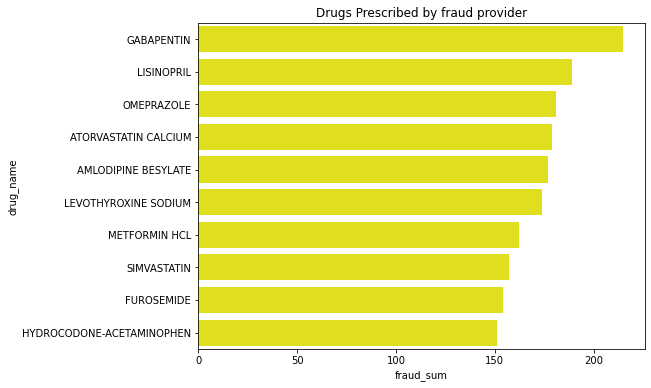

In [33]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(y="drug_name", x="fraud_sum", data=max_fraud
              , color="yellow", linewidth=0).set_title("Drugs Prescribed by fraud provider")

These are the drugs which are prescribed by the provides who did some fraud activities.GABAPENTIN is involved in most fraud activities like 215 times and HYDROCODONE-ACETAMINOPHEN is at the 10th position with 151 frauds.  